Link to Github repository: https://github.com/fridamariejoergensen/CSS_assignment2.git

### Contribution Statement

We, Frida(s206182), Cecilie(s214605), and Marie(s204052), collaborated on Assignment 2 in Jupyter Notebook.

All members collaborated and contributed to multiple parts of the assignment.

In [17]:
import nltk
nltk.download('stopwords')
import pandas as pd
import pickle
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import networkx.algorithms.community as nx_community
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
import networkx.algorithms.community as nx_comm
import netwulf
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fridajorgensen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Assignment 2

## Part 1: Mixing Patterns and Assortativity

### Exercise 1: Mixing Patterns and Assortativity.

**For each node, compute the fraction of edges that connect to a node that works in the same top field. Find the average value across all nodes.**

In [19]:
# Loading our CSS network
G = nx.read_gml('/Users/ceciliehvilsted/Documents/GitHub/CSSgenerel/css_network_update.json')

fractions = []
for i in list(nx.get_node_attributes(G, 'topField').keys()):
        #fields[i] = list(nx.get_node_attributes(G, 'topField').values())
        neighbors = G.neighbors(i)
        for n in neighbors:
            count = 0
            if nx.get_node_attributes(G, 'topField')[n] == nx.get_node_attributes(G, 'topField')[i]:
                count += 1
            fractions.append(count / G.degree[i])

av_frac = np.mean(fractions)
print('The average values across all nodes is:' + str(av_frac))

The average values across all nodes is:0.11079391145579195


**Create a new graph, with the same nodes and edges, but where the association between nodes and field is shuffled. Compute the measure above for this randomized graph.**

In [6]:
# Making a copy of the network
copy_G = G.copy()
# Assessing 'topField' attribute
field_list = list(nx.get_node_attributes(copy_G, 'topField').values())
# Shuffeling list of 'topField' attributes
random.shuffle(field_list)
# Setting node attribute as the shuffled attributes
shuffled = dict(zip(copy_G, field_list))
nx.set_node_attributes(copy_G, shuffled, 'topField')

# Computing fraction as above
fractions = []
for i in list(nx.get_node_attributes(copy_G, 'topField').keys()):
        neighbors = copy_G.neighbors(i)
        for n in neighbors:
            count = 0
            if nx.get_node_attributes(copy_G, 'topField')[n] == nx.get_node_attributes(copy_G, 'topField')[i]:
                count += 1
            fractions.append(count / copy_G.degree[i])
av_frac = np.mean(fractions)
print('The average values across all nodes in randomized graph is:' + str(av_frac))

The average values across all nodes in randomized graph is:0.09983056909909595


**Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Is the chance to connect to a member of the same field significantly higher than it would be by chance?**

In [7]:
X = []
# For loop for 100 repetitions
for i in range(100):
    copy_G = G.copy()
    # Assessing 'topField' attributes
    field_list = list(nx.get_node_attributes(copy_G, 'topField').values())
    # Shuffling attribute list 
    random.shuffle(field_list)
    # Setting shuffled attribute list as new attribute
    shuffled = dict(zip(copy_G, field_list))
    nx.set_node_attributes(copy_G, shuffled, 'topField')
    
    # Computing fraction as before
    fractions = []
    for i in list(nx.get_node_attributes(copy_G, 'topField').keys()):
            neighbors = copy_G.neighbors(i)
            for n in neighbors:
                count = 0
                if nx.get_node_attributes(copy_G, 'topField')[n] == nx.get_node_attributes(copy_G, 'topField')[i]:
                    count += 1
                fractions.append(count / copy_G.degree[i])
    X.append(np.mean(fractions))

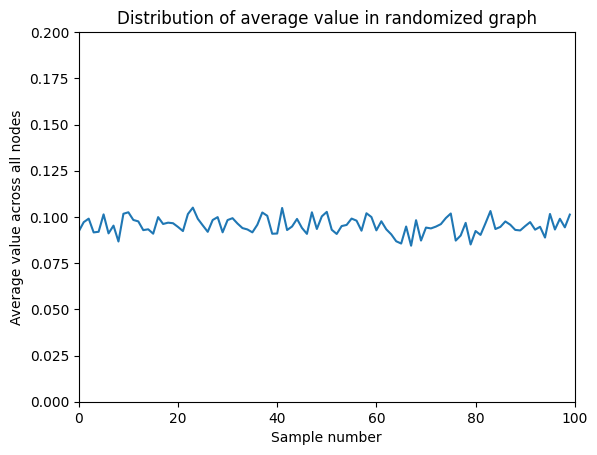

In [11]:
# Plotting the distribution of values
Y = np.arange(100)
plt.plot(Y,X)
plt.xlim(0,100)
plt.ylim(0,1)
plt.ylabel('Average value across all nodes')
plt.xlabel('Sample number')
plt.title('Distribution of average value in randomized graph')
plt.ylim(0,0.2)
plt.show()

The chance to connect to a member of the same field in the real network is not significantly higher than it would be by chance, actually the values are approximately equal.

**Compute the assortativity coefficient with respect to author's field. How do you interpret the value you obtain?**

In [30]:
def attribute_assortativity_coefficient(G, attribute):
    # get the mixing matrix for the attribute
    mixing_matrix = nx.attribute_mixing_matrix(G, attribute)
    
    # calculate the row and column sums of the mixing matrix
    row_sums = mixing_matrix.sum(axis=1)
    col_sums = mixing_matrix.sum(axis=0)
    
    # calculate the assortativity coefficient using the formula
    numerator = np.sum(np.multiply(mixing_matrix, np.outer(row_sums, col_sums)))
    denominator = np.sum(np.multiply(mixing_matrix, np.outer(row_sums, row_sums)))
    assortativity_coefficient = (numerator - denominator) / (1 - denominator)
    
    return assortativity_coefficient

asso_coef_css = attribute_assortativity_coefficient(G, 'topField')
print('Assortativity coefficient for CSS network is:' + str(asso_coef_css))

Assortativity coefficient for CSS network is:-3.4585341738992373e-17


The value found for the assortativity coefficient is very small meaning that people in the same fields doesn't tend to connect (have an edge between them in the network).

**Is the graph assortative with respect to the degree? (e.g. do high-degree scientists tend to link to other high-degree scientists, and low-degree scientists to other low-degree scientists?). Provide an interpretation of your answer.**

In [31]:
degree_asso_coef = nx.degree_assortativity_coefficient(G)
print('Degree assortativity coefficient for CSS network is:' + str(degree_asso_coef))

Degree assortativity coefficient for CSS network is:-0.07905783854646832


As the values is negative it means that high-degree scientits doesnt tend to link to other high-degree scientists (same for low-degree scientists).

## Part 2: Communities

### Exercise 2: Zachary's karate club:

**Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute)**

In [2]:
# Visualizing
data_graph = nx.karate_club_graph()
netwulf.interactive.visualize(data_graph)

(None, None)

In [3]:
# Coloring each node based in club split
club = nx.get_node_attributes(data_graph, 'club')
nx.set_node_attributes(data_graph, club, 'group')
netwulf.interactive.visualize(data_graph)

(None, None)

**Write a function to compute the modularity of a graph partitioning**

In [4]:
# Function for computing modularity of graph partinioning
def compute_modularity(G, partition):
    m = G.size(weight='weight')

    partition_weight = {p: 0 for p in set(partition.values())}
    partition_degree = {p: 0 for p in set(partition.values())}
    for u, v, data in G.edges(data=True):
        if partition[u] == partition[v]:
            partition_weight[partition[u]] += data['weight']
            partition_degree[partition[u]] += data['weight']

    Q = 0
    for p in set(partition.values()):
        Q += (partition_weight[p] / m) - ((partition_degree[p] / (2 * m)) ** 2)
    return Q

**Explain in your own words the concept of modularity**

Modularity is a measure of how good a division of a larger network into smaller communities is.Communities is defined by having a large amount of connections inside the community, but few connections that go outside the community (meaning they are a densely connected group). When calculating modularity it uses edge-betweeness.

**Compute the modularity of the Karate club split partitioning using the function you just wrote**

In [6]:
# Compute modularity of the Karate club split partitioning
club1 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}
club2 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}

dict = {}
for i in club1:
    dict[i] = 1
for i in club2:
    dict[i] = 2

club_mod = compute_modularity(data_graph, dict)
print('The modularity for the Karate "club" split is: ' + str(club_mod))

The modularity for the Karate "club" split is: 0.7922827533217144


**We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from 0. To do so, we will implement the double edge swap algorithm.**

**Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.**

In [7]:
# 5/6. Perform randomization experiment to assess if the modularity is statitically different from 0
rand_graph = data_graph.copy()
print('Number of edges in G before swap: ' + str(len(data_graph.edges)))

# implement the double edge swap algorithm
nx.double_edge_swap(rand_graph, nswap=90, max_tries=500)
print('Number of edges in G before swap: ' + str(len(rand_graph.edges)))


Number of edges in G before swap: 78
Number of edges in G before swap: 78


**Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.**

In [8]:
import networkx.algorithms.community as nx_comm
modularities = []

for i in range(1000):
    rand_G = data_graph.copy()
    nx.double_edge_swap(rand_G, nswap=90, max_tries=500)
    
    com_hi = {x for x,y in rand_G.nodes(data=True) if y['group']=='Mr. Hi'}
    com_of = {x for x,y in rand_G.nodes(data=True) if y['group']=='Officer'}
    
    modularities.append(nx_comm.modularity(rand_G, [com_hi, com_of]))

**Compute the average and standard deviation of the modularity for the random network.**

In [9]:
# Average and standard deviation
av = np.mean(modularities)
std = np.std(modularities)

print('Average of modularities is ' + str(av))
print('Standard deviation of modularities ' + str(std))

Average of modularities is 0.07280402723119822
Standard deviation of modularities 0.05169662751526167


**Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).**

The actual modularity is 0.39143756676224206


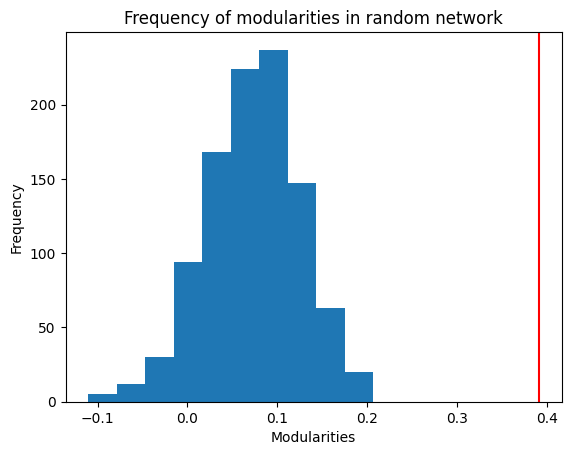

In [10]:
actual_mod = nx_comm.modularity(data_graph, [{x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}, {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}])

print('The actual modularity is ' + str(actual_mod))

plt.hist(modularities)
plt.xlabel('Modularities')
plt.ylabel('Frequency')
plt.title('Frequency of modularities in random network')
plt.axvline(actual_mod, color='red')

**Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?**

No, the club split is not a good partitioning, which is seen as the distribution doesn't even hold the actual value. We performed a randomization experiment to check if the split into clubs can be considered to be the same as if they were randomly assigned to each club. This is also the reason why we preserve the nodes, such that this specific comparison can be made.

**Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?**

In [11]:
# Value of modularity using Louvain-algorithm  
communities_z = nx_comm.louvain_communities(data_graph)
modularity_z = nx_comm.modularity(data_graph, communities_z)
print('The modularity of Louvain algorithm is ' + str(modularity_z))

The modularity of Louvain algorithm is 0.4438541256723075


The value found by Louvain is higher than the actual value found for the 'club' split. This comparison reveals that the Louvain algorithm has found better communities than dividing the network by the clubs.

**Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain. We set entry D(i,j) to be the number of nodes that community i has in common with group split j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.**

In [13]:
# Compute confusion matrix
club1 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}
club2 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}
comm_club = [club1, club2]

D = np.zeros((len(communities_z), len(comm_club)))

for i in range(len(comm_club)):
    for n in comm_club[i]:
        for j in range(len(communities_z)):
            if n in communities_z[j]:
                D[j][i] += 1

print('Confusion matrix is: ')
print(D)

Confusion matrix is: 
[[ 5.  0.]
 [ 1. 13.]
 [11.  0.]
 [ 0.  4.]]


From the confusion matrix we see that the Louvain algorithm divided the network into 4 communities. As each entry in the confusion matrix corresponds to the number of nodes each of the communities the club split have in common with each of the communities in the Louvain split it is clear, that only 1 node has floated to a club split while all others have every node from each Louvain community in the same club split. Also it tells us that the club split can be splitted once more into smaller communities, since 2 of the Louvain communities correspond to each club split.

### Exercise 3: Community detection on the network of Computational Social Scientists.

**Consider the network you built in Week 4.**

**Use the Python Louvain-algorithm implementation to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0?**

In [16]:
# Loading our CSS network
G = nx.read_gml('/Users/ceciliehvilsted/Documents/GitHub/CSSgenerel/css_network_update.json')

# Finding communities
import networkx.algorithms.community as nx_community
communities = nx_community.louvain_communities(G)

no_comm = len(communities)
print('The number of communities is ' + str(no_comm))

size_comm = []
for i in range(no_comm):
    size_comm.append(len(communities[i]))
print('The sizes of the communities are: ' + str(size_comm))

modularity = nx_community.modularity(G, communities)
print('The modularity is ' + str(modularity))

The number of communities is 94
The sizes of the communities are: [6, 17, 2, 2, 1, 25, 18, 1, 1, 1, 1, 9, 1, 3, 6, 2, 1, 1, 1, 43, 1, 31, 2, 1, 1, 33, 1, 1, 1, 1, 5, 1, 1, 1, 28, 1, 22, 2, 1, 24, 1, 1, 2, 18, 14, 2, 6, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 3, 1, 20, 1, 1, 1, 1, 1, 2, 1]
The modularity is 0.826784554265975


The value of modularity is not significantly different from 0.

**Visualize the network, using netwulf (see Week 5). This time assign each node a different color based on their community. Describe the structure you observe.**

In [17]:
# Visualize network
binary_comm = {}
for i in G.nodes:
    for j in communities:
        if i in j:
            binary_comm[i] = communities.index(j)

nx.set_node_attributes(G, binary_comm, 'group')
netwulf.interactive.visualize(G)

(None, None)

The structure of the network is a bit cluttered in the middle, and then many lonely nodes around as well as nodes with a small amount of connections. This network has only been made on 100.000 authorIds from our paper datafram (found in the beginning of the course), because we didn't have the resources to run through all authorIds.

In [18]:
from networkx.readwrite import json_graph
css_network_update = json_graph.node_link_data(G)
nx.write_gml(G, "/Users/ceciliehvilsted/Documents/GitHub/CSSgenerel/css_network_update.json")

**Make sure you save the assignment of authors to communities.**

## Part 3: TF-IDF.

### Exercise 4: TF-IDF and the Computational Social Science communities.

TF-IDF is an approach for representing text that involves the product of two components, term frequency (TF) and inverse document frequency (IDF). The term frequency is determined by dividing the number of occurrences of a specific word in a sentence by the total number of words in that sentence. The inverse document frequency is calculated by taking the logarithm of the total number of sentences in the corpus divided by the number of sentences that contain the specific word. The resulting TF-IDF score is obtained by multiplying the TF and IDF values for each word.

An advantage of TF-IDF over other text representation techniques, such as the bag of words model, is its ability to give an estimation of the semantic meaning of words. While the bag of words model simply represents words as binary values (either present or absent), TF-IDF scores indicate the relative importance of words in different sentences by comparing their scores. For example, if a word is present in every sentence of a corpus, its IDF value would be log(1)=0, resulting in a TF-IDF score of 0 for that word, indicating that it does not convey any special meaning in those sentences.

##### For the next exercise we need:

*  The assignment of each author to their network community, and the degree of each author. 
This is stored in a dataframe:


In [3]:
G = nx.read_gml('css_network_update.json')
communities = nx_community.louvain_communities(G)

# Dictionary for community assignments and degree of each author
data = {'authorIds': [], 'Community': [], 'Degree': []}

# Loop over each author in the network
for author in G.nodes():
    data['authorIds'].append(author)
    
    for i, community in enumerate(communities):
        if author in community:
            data['Community'].append(i)
            break
    
    data['Degree'].append(G.degree(author))

# Create dataframe
df_community = pd.DataFrame(data)
df_community


,authorIds,Community,Degree
0,1684687,41,10
1,1401290379,18,5
2,1747178,0,4
3,145791827,41,14
4,12619623,41,8
...,...,...,...
427,1719389,90,0
428,1764577,41,1
429,38906978,91,1
430,51440256,91,1


#### And: 
* The tokenized abstract dataframe which is also stored in a pandas dataframe:
<span style="color:red">OBS* Det er kun en lille pickle (skal vi lige ha lavet om)<span style="color:red">

In [5]:
# Loading abstract pickle
with open('css_abstract', "rb") as f:
        css_abstract = pickle.load(f)

In [6]:
# Load stop words
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token != 'none' and token != 'nan']
    return tokens

# Tokenize and save in new column 'tokens'
css_abstract['abstract'] = css_abstract['abstract'].astype(str)
css_abstract['tokens'] = css_abstract['abstract'].apply(tokenize_text)
css_abstract


,paperId,title,year,externalId.DOI,citationCount,fields,authorIds,abstract,tokens
219,288f55879cc77a1317aba73a51651405c7c69d24,Over-Time Trends in Incivility on Social Media...,2021.0,10.3389/fpos.2021.741605,3,[[Sociology]],"[[47632726, 2496439, 102536922]]",nan,[]
225,684fbf37238d50c6163cc4676aaa1d13ef94086b,Multiplicity and dynamics of social representa...,2022.0,10.1016/j.ipm.2022.102990,1,[[Sociology]],"[[1720731753, 2117981295, 1720756214, 20076683...",nan,[]
283,3b6cd901c4d1485237f2437e3f58760e37b2c393,As real as real? Macroeconomic behavior in a l...,2009.0,10.1177/1461444809105346,145,[[Economics]],"[[2022803, 30904401, 39003910, 1768137, 206823...",nan,[]
303,16a77f15b5eee697979a6e700a3138df2037e942,What Information Drives Political Polarization...,2021.0,10.1177/19401612211004418,4,[[Economics]],"[[2496439, 1735860, 2116330104, 1506167488]]",nan,[]
423,1c8b8baf806b423f5604259fb9206b9eb18d5dc0,Guilt by association? Network based propagatio...,2013.0,10.1145/2492517.2492649,8,[[Economics]],"[[145919340, 145832870, 143922076, 30904401, 1...",nan,[]
...,...,...,...,...,...,...,...,...,...
172394,6f811930f1c1c36b9955f10d7ab95a88d5811e10,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
172421,f35cf07fbad48c007586155508ca436b2b12e686,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
192263,95b16af3dd501525ba799db2d81a8b3874898759,NaN,NaN,NaN,NaN,NaN,NaN,None,[]
197148,8eff870a1941068f591b25cc824184c45e6e7067,NaN,NaN,NaN,NaN,NaN,NaN,We study the ever more integrated and ever mor...,"[study, ever, integrated, ever, unbalanced, tr..."


Now, we want to find out which words are important for each community, so we're going to create several *large documents, one for each community*. Each document includes all the tokens of abstracts written by members of a given community.

* Consider a community c
* Find all the abstracts of papers written by a member of community c.
* Create a long array that stores all the abstract tokens
* Repeat for all the communities.

(To ensure your code is efficient, you shall exploit pandas builtin functions, such as groupby.apply or explode)

**Find the top 5 terms within the top 5 communities (by number of authors).**

In [ ]:
# Ikke garanteret, at det virker før bedre pickle og large documents
# Calculate the TF for each word
vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(communities)
word_freq = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names())

# Get the top 5 words for each of the top 5 communities
top_words = []
for i in range(5):
    community_words = word_freq.loc[i].sort_values(ascending=False)[:5].index.tolist()
    top_words.append(community_words)

# Print the top 5 words for each community
for i in range(5):
    print(f"Top 5 words for community {i+1}: {', '.join(top_words[i])}")


**Describe similarities and differences between the communities.**
<br>
<span style="color:red">?<span>

**Why aren't the TFs not necessarily a good description of the communities?**

The TFs are not necessarily a good description or basis of comparison for the communities, as it gives a very superficial insight into a community, because it only helps identify the most frequent words used by the community, but not their context. Therefore, some words may have high TF within a specific community, but they may not be unique to that community and may not provide much information about the community's characteristics or differences from other communities. The size of the communities also varies a lot, with some communities having almost double the amount of authors. Taking this into account, the TFs for the same word in the different communities may not be directly comparable. 


In [ ]:
# Ikke garanteret, at det virker før bedre pickle og large documents
# IDF for every word
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(communities)
idf = vectorizer.idf_

# Create a dataframe with the IDF for every word
idf_df = pd.DataFrame(list(zip(vectorizer.get_feature_names(), idf)), columns=['Word', 'IDF'])

# Get the top 5 words with the highest IDF
top_words = idf_df.sort_values('IDF', ascending=False)[:5]['Word'].tolist()

# Print the top 5 words with the highest IDF
print(f"Top 5 words with highest IDF: {', '.join(top_words)}")

We're ready to calculate TF-IDF. Do that for the top 9 communities (by number of authors). Then for each community:

* List the 10 top TF words
* List the 10 top TF-IDF words

**Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?** 
<br> <br>
The top 10 TF-IDF words are more descriptive than the TF words. This makes sense, since it weights the frequency by the inverse document frequency. So analyzing a community of authors based on the top TF-IDF words is a better approach than TF in order to capture unique characteristics.

**List the top 3 authors (by degree)**

In [16]:
largest_communities = df_community['Community'].value_counts().nlargest(9).index.tolist()
community_df_filtered = df_community.loc[df_community['Community'].isin(largest_communities)]
community_df_filtered_sorted = community_df_filtered.sort_values(by=['Community', 'Degree'], ascending=[True, False])
top_authors_by_community = community_df_filtered_sorted.groupby('Community').head(3)

# Top 3 authors from 9 biggest communities
print(top_authors_by_community)

      authorIds  Community  Degree
60      1733303          3      40
209   144240725          3      17
89      2146531          3      16
44      1682773          8      16
74      1705156          8      14
77      2327052          8      12
22      1743043         15      16
118   144065562         15      12
143    67128030         15       9
99      1714923         16      10
11     23193291         16       9
119     1757448         16       5
47      1795135         18      18
137     2332167         18      14
12    143634219         18      12
20      2676839         31      16
55   2007674493         31       7
178     1799402         31       7
81      1958921         41      26
38      1869561         41      18
3     145791827         41      14
174     2698329         46      35
23      1826736         46      10
193     2414047         46      10
144    46886279         85      19
86      3185333         85       8
136     3306556         85       8


### Exercise 5: The Wordcloud.

**Create word-cloud for each community. Print the names of the top three authors in each community.**

**Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?**

**Look up online the top author in each community. In light of your search, do your results make sense?**